# Predicting Late Parcel Delivery
**Authors :**  
1. **Kevin Alkindy (Project Group Leader)**  
2. Aris Rigel P.  
3. Arief Maulana   
4. Muhammad Rezadiandra   
5. Annisa Dwinda F. H.   
6. Kindy Nurhakim

Source of dataset : https://www.kaggle.com/prachi13/customer-analytics

The data contains the following information:  
1. **ID** : ID Number of Customers.
2. **Warehouse block** : The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
3. **Mode of shipment** :The Company Ships the products in multiple way such as Ship, Flight and Road.
4. **Customer care calls** : The number of calls made from enquiry for enquiry of the shipment.
5. **Customer rating** : The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. **Cost of the product** : Cost of the Product in US Dollars.
7. **Prior purchases** : The Number of Prior Purchase.
8. **Product importance** : The company has categorized the product in the various parameter such as low, medium, high.
9. **Gender** : Male and Female.
10. **Discount offered** : Discount offered on that specific product. 
11. **Weight in gms** : It is the weight in grams.
12. **Reached on time** : It is the target variable, where 1 Indicates that the
product has NOT reached on time and 0 indicates it has reached on time.


# 1. Exploratory Data Analysis (EDA)

## 1.1. Import Library

In [1]:
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') # use style fivethirtyeight
import seaborn as sns
from matplotlib import rcParams

# To avoid warning
import warnings 
warnings.filterwarnings("ignore")

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Feature Selection
from scipy.stats import chi2_contingency

# Splitting the data into Train and Test
from sklearn.model_selection import train_test_split

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## 1.2. Load Dataset

In [2]:
df = pd.read_csv('Train.csv')
# Display the top 5 rows of data
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**Summary**:  
1. The feature names are written with the capital letter. Changing it into lowercase can make the data preprocessing easier.
2. The target's name could be simplified.

### Rename target's column 
Because of the target's name is too long, so we simplify the name to ease the next step.

In [3]:
df.rename(columns={'Reached.on.Time_Y.N':'is_late'}, inplace=True)

### Change all column names to lower case

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.columns = df.columns.str.lower()

### 1.3. General information of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  is_late              10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**Summary:**
1. The data consists of 12 columns / features and 10999 rows.
2. All the features do not have missing values.
3. There are only two types of data types, such as int64 and object.
4. Our target class label is *is_late* whereas 0 indicates on time and 1 indicates late.

## 1.4. Descriptive Statistics 

In [7]:
# Categorical data
categorical = ['warehouse_block','mode_of_shipment','product_importance', 'gender', 'is_late', 'customer_rating']
# Numerical data
numeric = ['customer_care_calls', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms']

In [8]:
# for integer data type
df.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,is_late
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
# for object data type
df.describe(exclude='int64')

,warehouse_block,mode_of_shipment,product_importance,gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [10]:
# for categorical column
for col in categorical:
    print('Value count kolom', col, ':')
    print(df[col].value_counts())
    print()

Value count kolom warehouse_block :
F    3666
D    1834
A    1833
B    1833
C    1833
Name: warehouse_block, dtype: int64

Value count kolom mode_of_shipment :
Ship      7462
Flight    1777
Road      1760
Name: mode_of_shipment, dtype: int64

Value count kolom product_importance :
low       5297
medium    4754
high       948
Name: product_importance, dtype: int64

Value count kolom gender :
F    5545
M    5454
Name: gender, dtype: int64

Value count kolom is_late :
1    6563
0    4436
Name: is_late, dtype: int64

Value count kolom customer_rating :
3    2239
1    2235
4    2189
5    2171
2    2165
Name: customer_rating, dtype: int64



**Summary:**
1. Based on the descriptive statistics above, the distribution of feature customer_care_calls and customer_rating could be said as normal distribution. The customers make 4 phone calls to the customer care on average. It can be an indicator that most of the parcels delivered late. While the distribution of customer ratings given by the company are similar each other.
2. Feature cost_of_product, discount_offered, weight_in_gms have skewed distributions.
3. Feature prior_purchases and discount_offered might have the outliers. However it can be categorized as a natural outliers. It's possible for customers to do more than 4 or 5 prior transactions. Moreover it's also possible for the certain products to have more discounts.
4. There are 5 warehouse_block, 3 mode of shipment, 3 category of product importance.
5. Female customers are more dominant than male customers, but the proportion is still balance.

## 1.5. Data Visualization & Analysis

In [11]:
# Make a copy of dataset
df_eda = df.copy()

### 1.5.1. Class Label Distribution

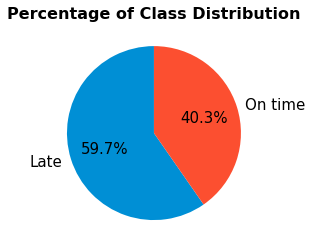

In [12]:
df_eda['is_late'].value_counts().plot.pie(autopct='%1.1f%%',labels=['Late','On time'], 
                                        textprops={'fontsize': 15},
                                        startangle = 90);
plt.ylabel('');
plt.title('Percentage of Class Distribution', size = 16, weight = 'bold');

The `late label` is considered as a positive class label, because it is the main focus in this project. The class ratio is balance enough. Percentage of late delivery is 59.7% of all observations.

### 1.5.2. Univariate Analysis

### 1.5.2.1. Categorical data

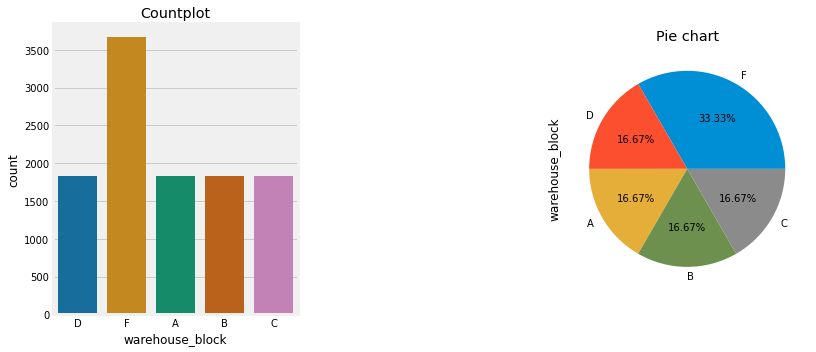

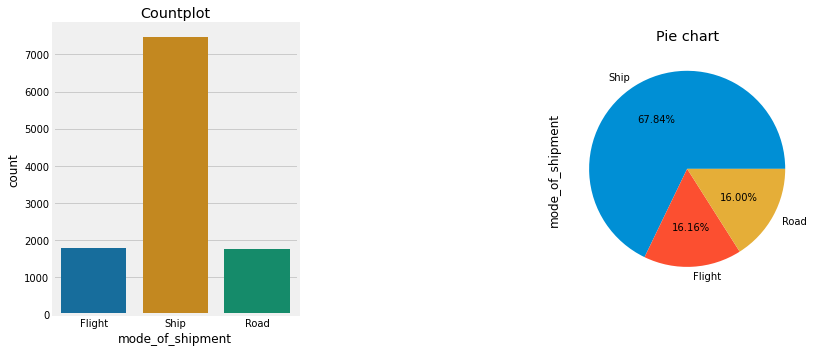

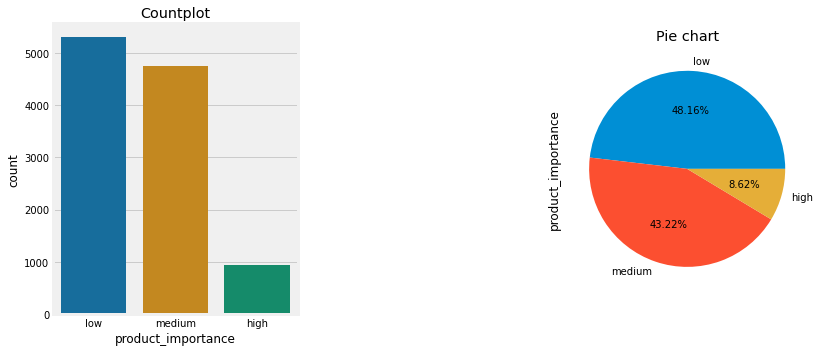

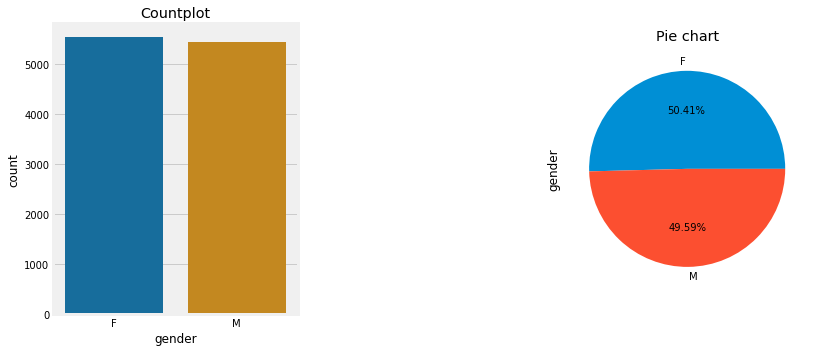

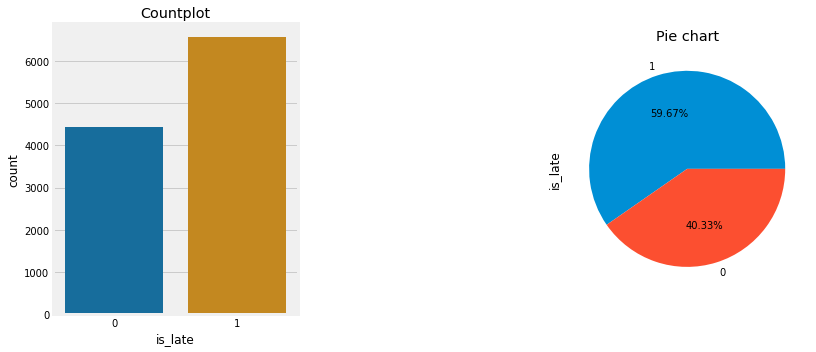

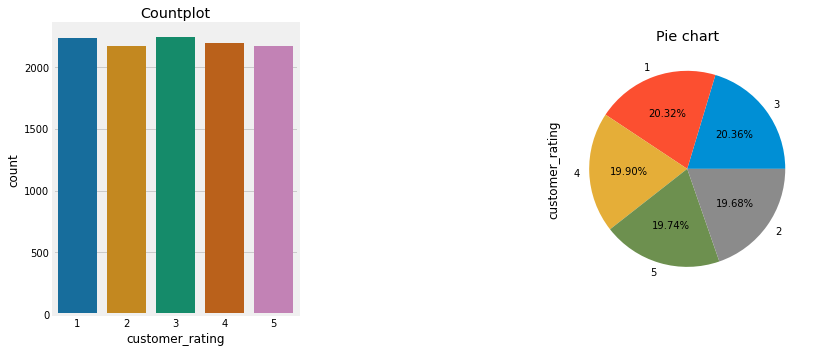

In [13]:
# Plot categorical columns
for col in categorical:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(141);
    sns.countplot(df_eda[col], palette = 'colorblind', orient='v');
    plt.title('Countplot')
    plt.tight_layout();
    
    plt.subplot(143);
    df_eda[col].value_counts().plot.pie(autopct='%1.2f%%');
    plt.title('Pie chart')  

**Summary:**
* Feature **Warehouse_Block** has 5 unique values and most of parcels are stored in *warehouse_block_f*.
* Feature **Mode_of_Shipment** has 3 unique values and ship dominates the shipping mode.
* Feature **Product_importance** has 3 unique values. Most of products are low category.
* Most of customers are dominated by female





### 1.5.2.2. Numerical data

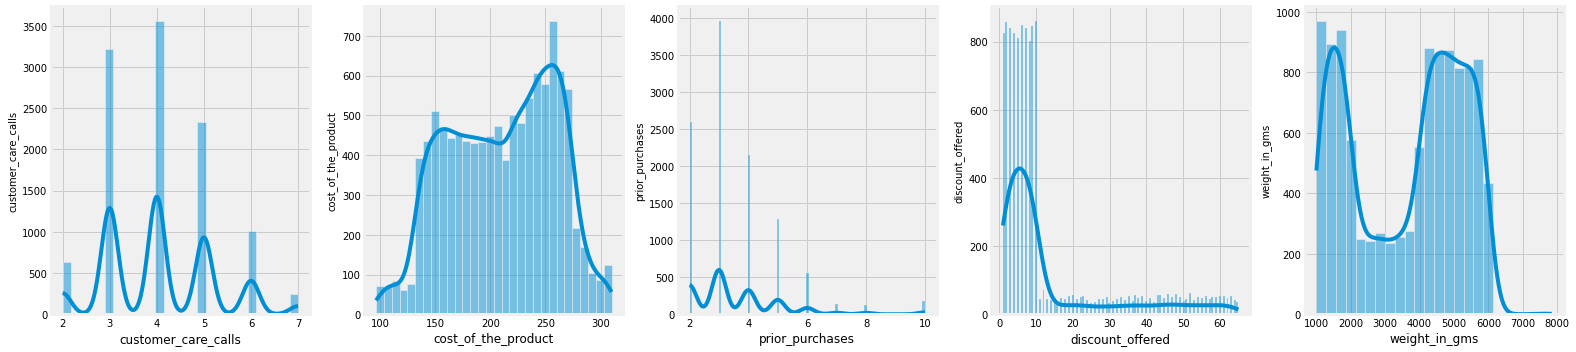

In [14]:
# Plot Histogram
plt.figure(figsize=(22,5))
for i in range(0,len(numeric)):
    plt.subplot(1, 5, i+1)
    sns.histplot(x = df_eda[numeric[i]], kde = True)
    plt.ylabel(numeric[i],size=10)
    plt.yticks(size = 10)
    plt.tight_layout();

* Feature customer_care_calls has a multimodal distribution, since there are more than two peaks. Most of the customers call for 4 times. However the number of calls drop significantly after 4 times.
* Most of cost the products lie between range 150 - 275.
* most customers have previously made 3 transactions, then the trend keeps decreasing after 3 times.
* Most of discount of products are less or equal to 10%. So this feature has a right skewed distribution.
* The weight of parcels are dominated by up to 2kg and 4kg - 6kg.

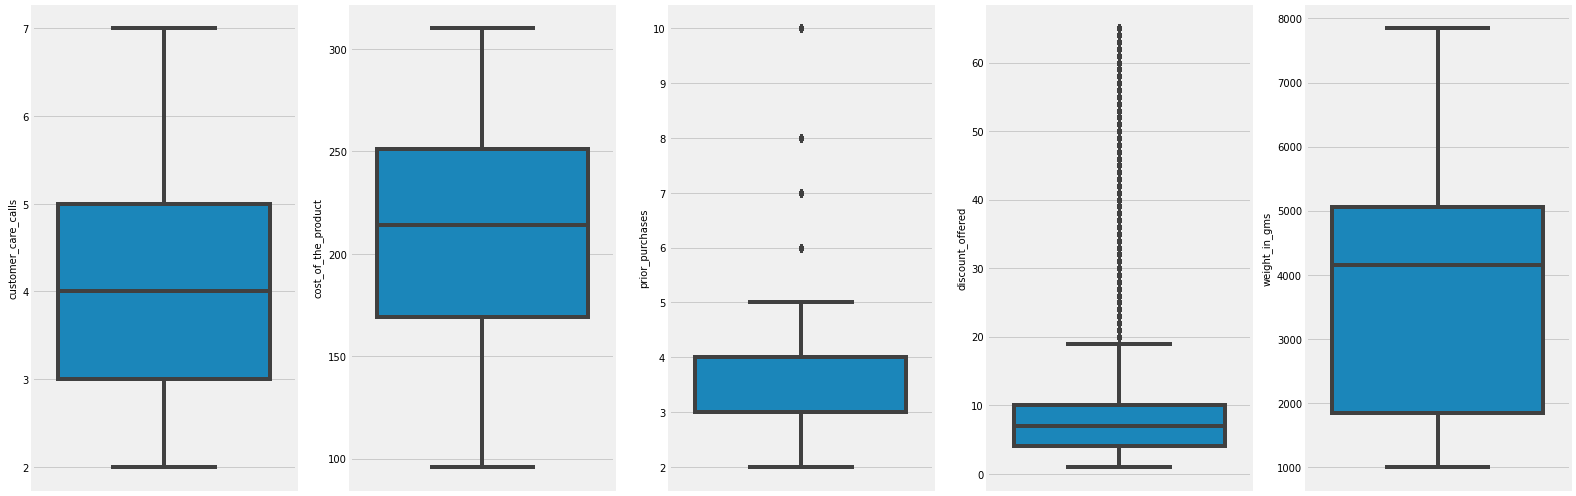

In [15]:
# Boxplot
plt.figure(figsize=(22,7))
for i in range(0,len(numeric)):
    plt.subplot(1, 5, i+1)
    sns.boxplot(y = df[numeric[i]])
    plt.ylabel(numeric[i],size=10)
    plt.yticks(size = 10)
    plt.tight_layout();

### 1.5.3. Bivariate Analysis

#### 1.5.3.1. Correlation Heatmap

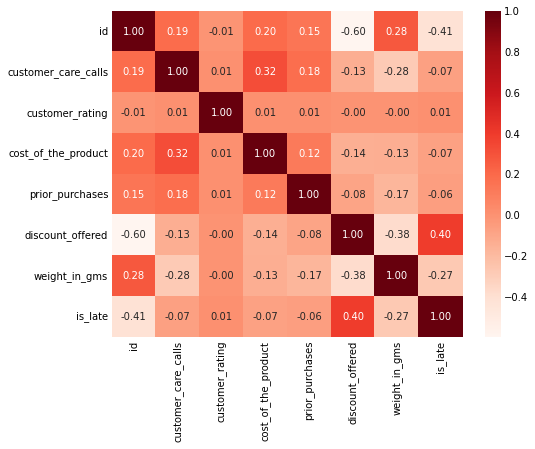

In [16]:
plt.figure(figsize=(7,6));
sns.heatmap(df_eda.corr(), annot = True, fmt = '.2f', cmap = 'Reds');

**Summary:**
1. Te target variable has a moderate positive correlation with feature discount_offered and low negative correlation with weight_in_gms.
2. Feature customer_care_calss has a low positive correlation with cost_of_the_product and low negative correlation wih weight_in_gms.
3. Feature discount_offered has a moderate positive correlation with weight_in_gms.




#### 1.5.3.2. Pairplot

<Figure size 360x360 with 0 Axes>

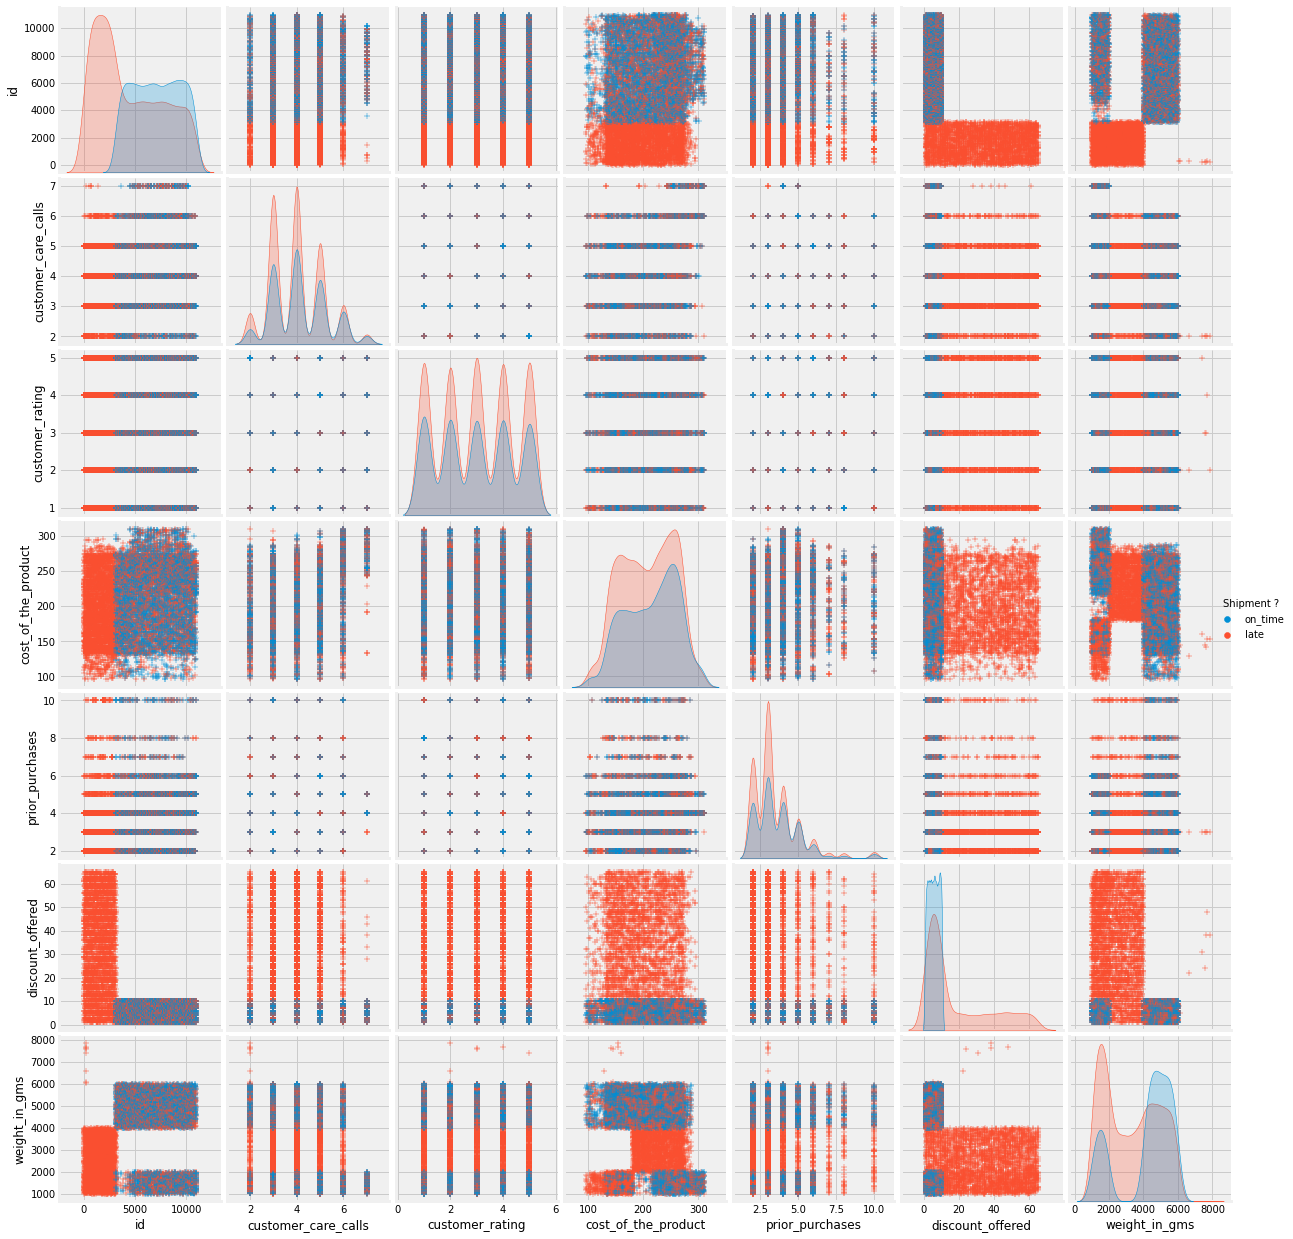

In [17]:
plt.figure(figsize=(5, 5));
p = sns.pairplot(df_eda, markers = '+', diag_kind = 'kde', hue = 'is_late');
# title
new_title = 'Shipment ?'
p._legend.set_title(new_title);

# replace labels
new_labels = ['on_time', 'late']
for t, l in zip(p._legend.texts, new_labels): t.set_text(l);

1. The products with discount less or equal to 10%, weight less or equal to 2Kg, 4Kg - 6Kg tend to deliver on time.
2. Most of the parcel with discount more than 10% are late and most of the customers who call to the CS have experienced late parcel delivery.

#### 1.5.3.3. Stripplot

**a.Numeric - Warehouse block**

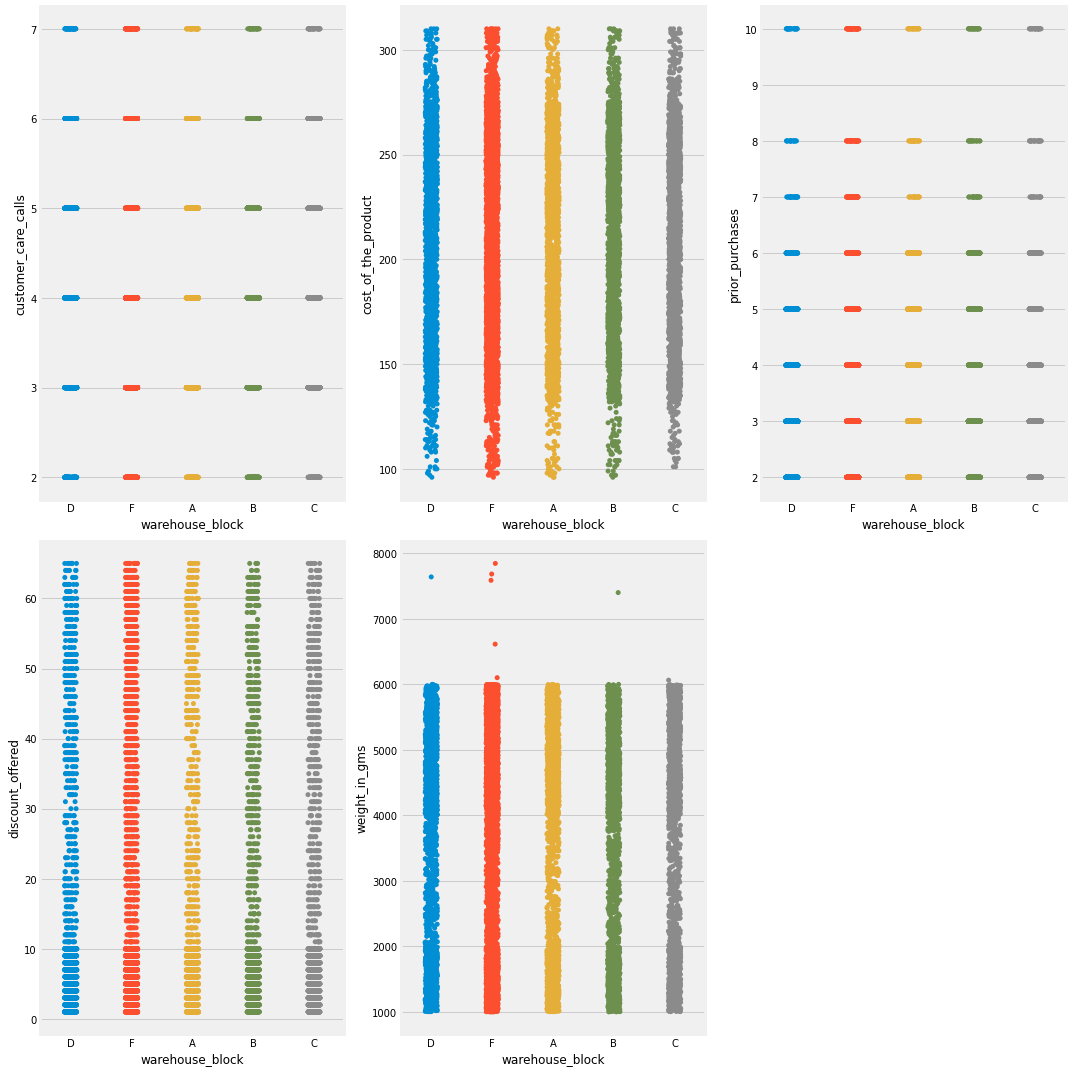

In [18]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numeric)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df_eda, x='warehouse_block', y=numeric[i]) # gambar catplot/stripplotnya
    plt.tight_layout() # layout

    if i != 0: plt.close(i+1) # close figure 

    plt.close(len(numeric) + 1) # close figure 

It can be seen that several items weighing more than 6000 grams are stored in warehouse_blocks B, D, & F.

**b.Numeric - Mode of Shipment**

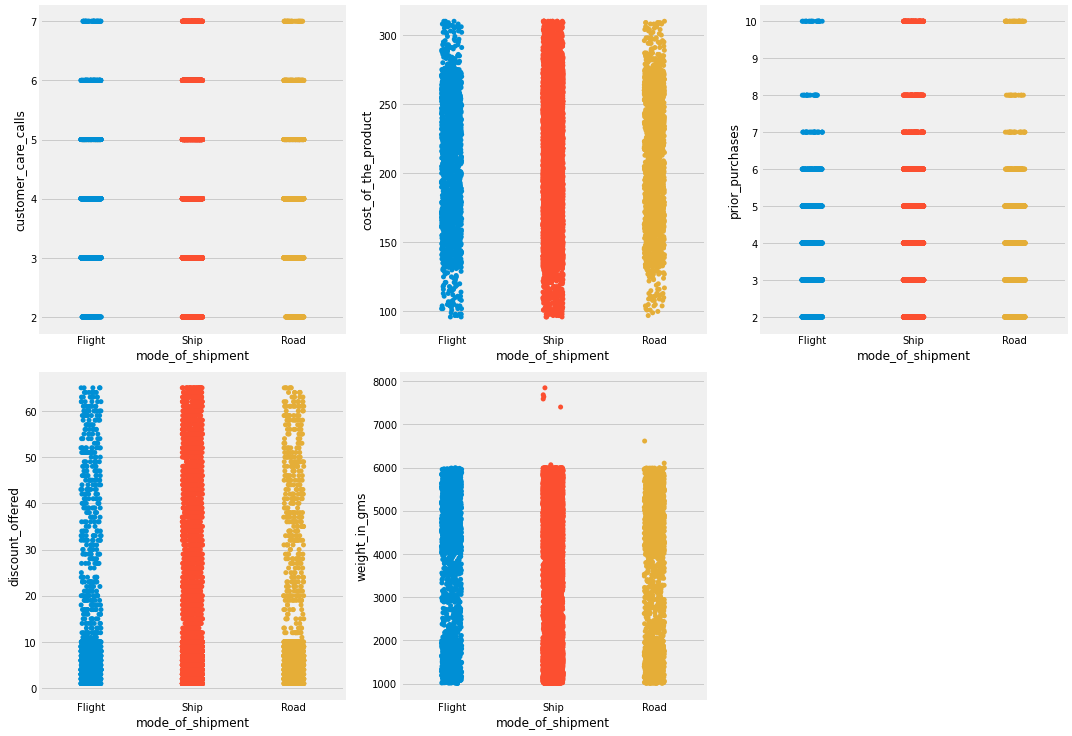

In [19]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numeric)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df_eda, x='mode_of_shipment', y=numeric[i]) # gambar catplot/stripplotnya
    plt.tight_layout() # layout

    if i != 0: plt.close(i+1) # close figure 

    plt.close(len(numeric) + 1) # close figure 

It can be seen that some items weighing over 6000 gr are sent using `ship` & `road`. The mode of delivery using the ship can accommodate goods with large loads.


**c.Numeric - Product Importance**

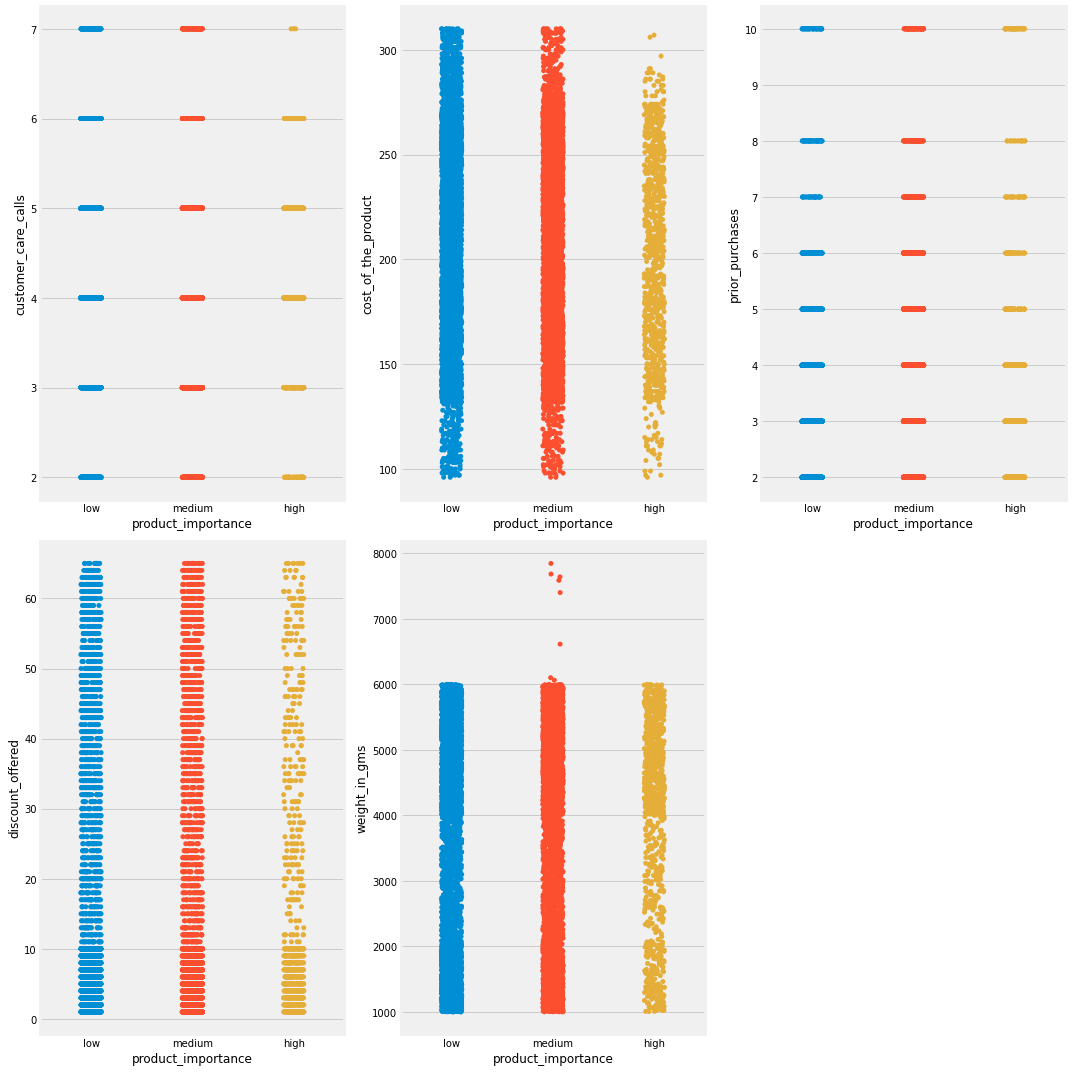

In [20]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numeric)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df_eda, x='product_importance', y=numeric[i]) # gambar catplot/stripplotnya
    plt.tight_layout() # layout

    if i != 0: plt.close(i+1) # close figure 

    plt.close(len(numeric) + 1) # close figure 

- It can be seen that some items weighing more than 6000 gr are sent in 'medium' priority.
- Most of the products sent in the high priority category are in the price range of 130 - 280 dollars.

**d.Numeric - Gender**

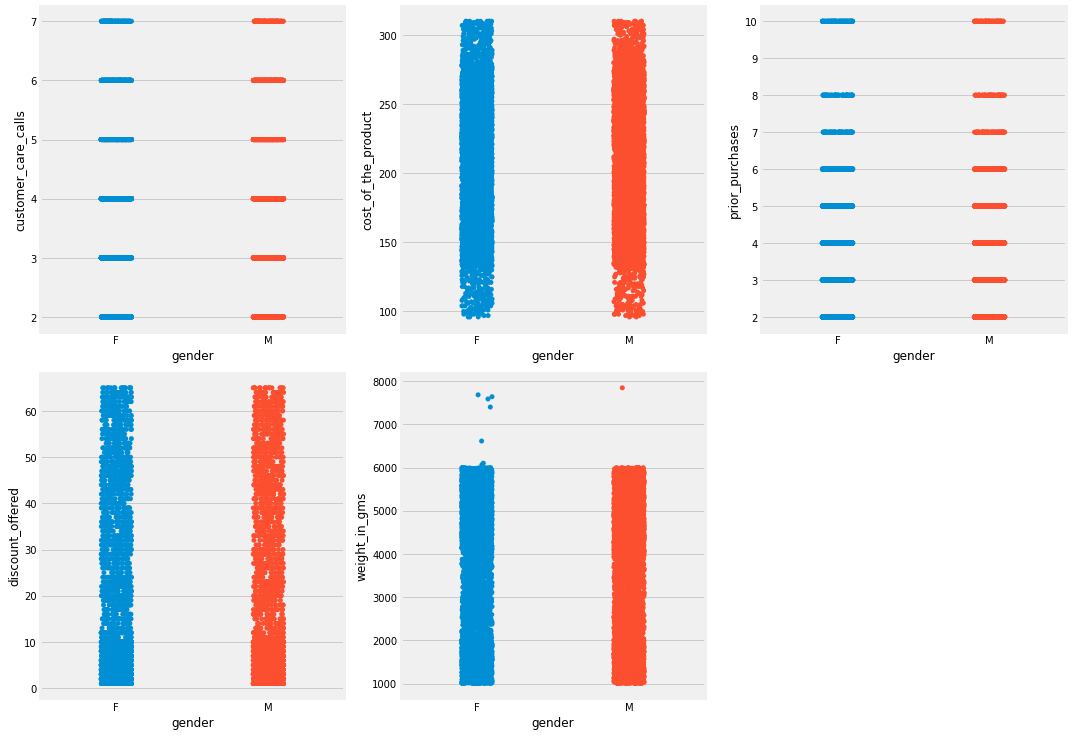

In [21]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(numeric)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df_eda, x='gender', y=numeric[i]) # gambar catplot/stripplotnya
    plt.tight_layout() # layout

    if i != 0: plt.close(i+1) # close figure 

    plt.close(len(numeric) + 1) # close figure 

`gender` doesn't seem to have any correlation with other numerical features.

#### 1.5.3.4.Categorical vs Categorical

##### Based on Gender

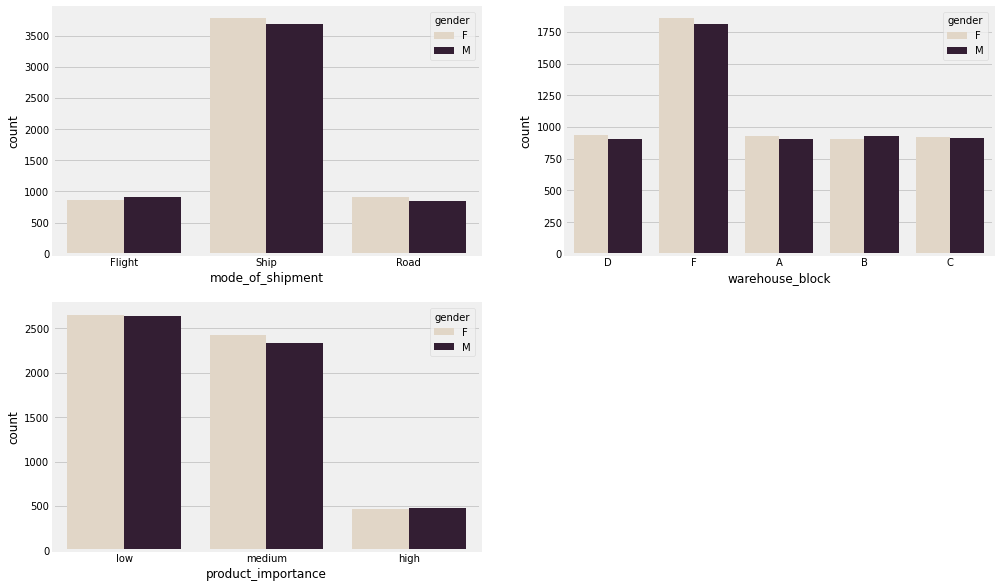

In [22]:
i=1
plt.figure(figsize=(15,10))
for col in ['mode_of_shipment', 'warehouse_block', 'product_importance']:
    plt.subplot(2,2,i)
    sns.countplot(df_eda[col], hue=df_eda['gender'], palette="ch:.25")
    i+=1

- The number of female customers in all warehouse_blocks dominates more than male customers, except in warehouse_block B.

##### Based on Product Importance

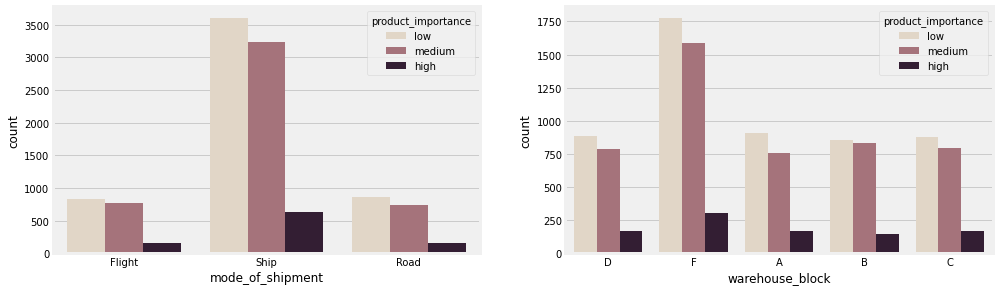

In [23]:
i=1
plt.figure(figsize=(15,10))
for col in ['mode_of_shipment', 'warehouse_block']:
    plt.subplot(2,2,i)
    sns.countplot(df_eda[col], hue=df_eda['product_importance'], palette="ch:.25")
    i+=1

The parcels with high & low priority use the shipping mode the most.


##### Warehouse block - Mode of Shipment

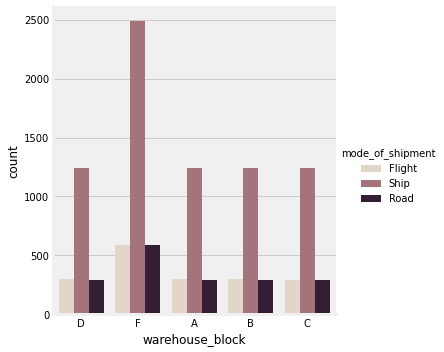

In [24]:
sns.catplot(x="warehouse_block", kind="count", hue='mode_of_shipment',
            palette="ch:.25", data=df_eda);

- The ship is the most used shipment mode in all warehouse block, while the proportion of flight and road  are almost the same.

##### Based on target 'is_late'

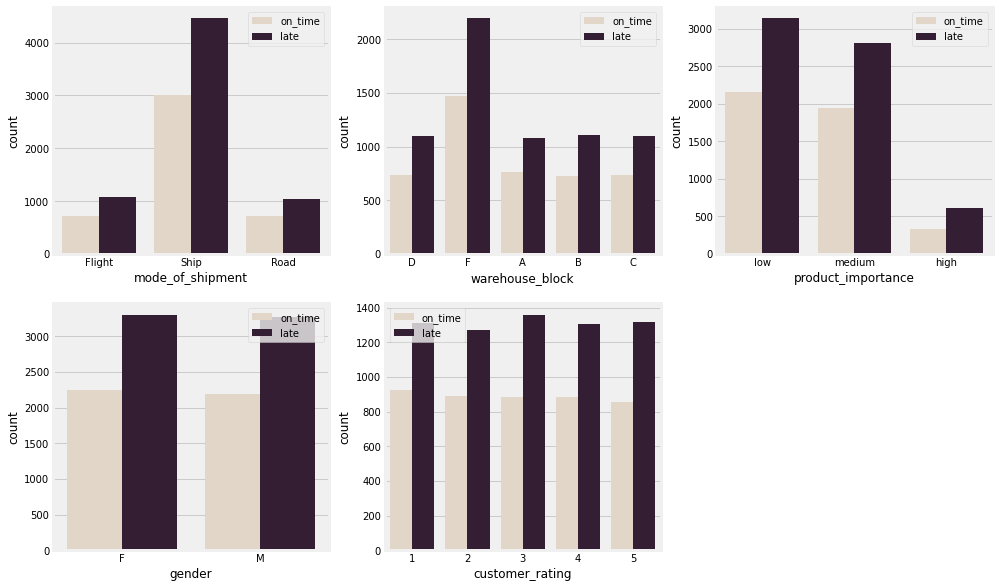

In [25]:
i=1
plt.figure(figsize=(15,10))
for col in ['mode_of_shipment', 'warehouse_block', 'product_importance',
            'gender','customer_rating']:
    plt.subplot(2,3,i)
    sns.countplot(df_eda[col], hue=df_eda['is_late'], palette="ch:.25")
    i+=1
    plt.legend(['on_time','late']);

- Most of parcels from warehouse_block F are delivered late and sent by ship.
- Flight shipping shows the least number of on time delivery. However it is because the total amount of parcels delivered by this mode are actually the lowest.
- Most low priority parcels are not on time

<font size='5'> **So why are the parcels delivered late ?**

<font size='4'>Based on the analysis above, there are 2 main causes :
    
<font size='4'>1. the storage at the 5 warehouse blocks are not distributed fairly. Most of the parcels are stored in warehouse block F, so that it is possible to overload during the sorting, loading, and unloading processes. 

<font size='4'>2. The shipment tends to deliver on time when the discount under 10%
and the weight is 1 - 2kg and 4 - 6kg. This means the weight and discount infuence the delivery

# 2. Data Preprocessing

In [26]:
# create a copy of dataset
df_dt = df.copy()

## 2.1. Identify Missing Values

In [27]:
df_dt.isna().sum()  # Calculate missing values

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
is_late                0
dtype: int64

From the result above, there is no missing value in each feature

## 2.2. Identify Duplicated Values

In [28]:
# Select all duplicate rows based on all columns
df_dt[df_dt.duplicated(keep=False)] 

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,is_late


In [29]:
# Select all duplicate rows based on selected column
df_dt[df_dt.duplicated(subset=['id'],keep=False)] # Display all duplicated rows based on column 'id'

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,is_late


Both results above can conclude that the data doesn't have duplicated values.

## 2.3. Identify & Handle Outliers

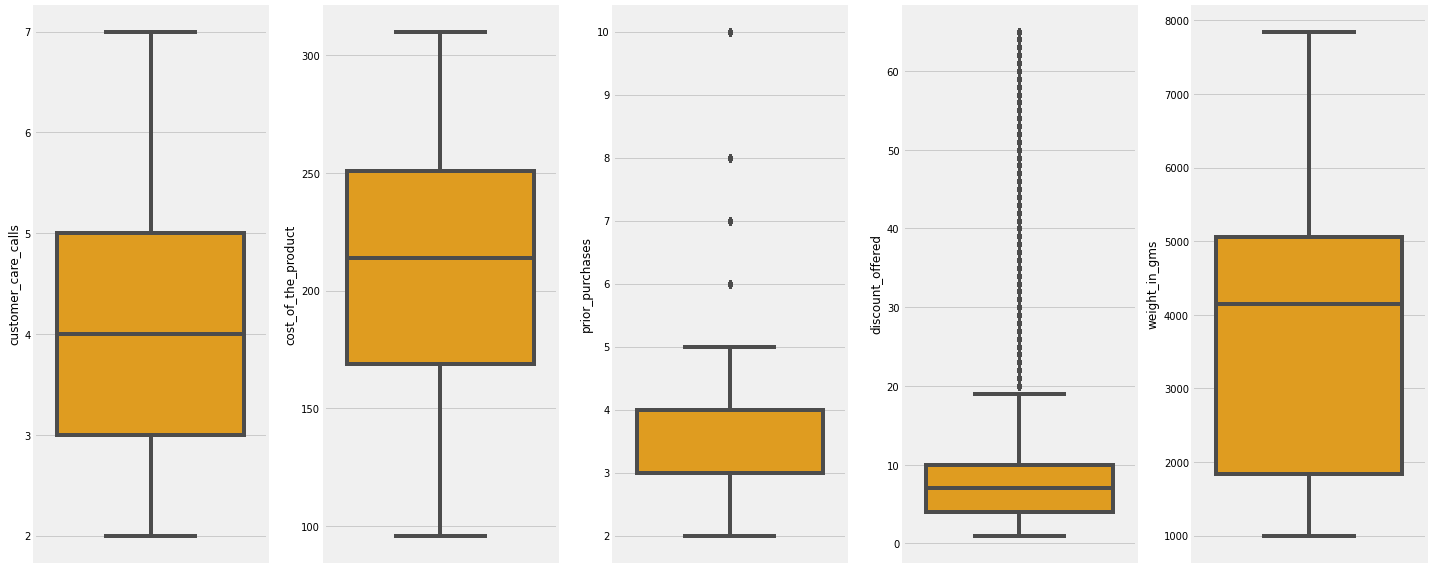

In [30]:
# Identify using boxplot
plt.figure(figsize=(20,8))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.boxplot(y=df_dt[numeric[i]], color='orange')
    plt.tight_layout()

The boxplot can be used to detect the existing outliers in each features. Figure above represents that there are two features with outiers, namely prior_purchases and discount_offered. For more detail, we will check the outliers using IQR method.

In [31]:
# Identify outlier using IQR
for col in numeric:
    
    # Calculate IQR
    Q1 = df_dt[col].quantile(0.25)
    Q3 = df_dt[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower limit and upper limit 
    min_value = df_dt[col].min()
    max_value = df_dt[col].max()
    lower_lim = Q1 - (1.5*IQR)
    upper_lim = Q3 + (1.5*IQR)
    
    # Calculate the outliers in each feature

    if (min_value < lower_lim):
        print('Low outlier is found in column',col,'<', lower_lim,'\n')
        #display total low outlier 
        print('Total of Low Outlier in column',col, ':', len(list(df_dt[df_dt[col] < lower_lim].index)),'\n')
    elif (max_value > upper_lim):
        print('High outlier is found in column',col,'>', upper_lim,'\n')
        #display total high outlier 
        print('Total of High Outlier in column',col, ':', len(list(df_dt[df_dt[col] > upper_lim].index)),'\n')
        
    else:
        print('Outlier is not found in column',col,'\n')
        

Outlier is not found in column customer_care_calls 

Outlier is not found in column cost_of_the_product 

High outlier is found in column prior_purchases > 5.5 

Total of High Outlier in column prior_purchases : 1003 

High outlier is found in column discount_offered > 19.0 

Total of High Outlier in column discount_offered : 2209 

Outlier is not found in column weight_in_gms 



The total of outliers on feature `discount_offered` & `prior_purchases` are more than 50% of the data. It should be handled properly, so that we don't miss a lot of information. Moreover, the outliers can be categorized as the natural outliers.

In [32]:
'''
To handle the outliers, we replace the outlier values with the upper bound values
'''
#Iteration
for col in ['prior_purchases', 'discount_offered']:
    # Initiate Q1
    Q1 = df_dt[col].quantile(0.25)
    # Initiate Q3
    Q3 = df_dt[col].quantile(0.75)
    # Initiate IQR
    IQR = Q3 - Q1
    # Initiate lower_bound & upper_bound 
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    # Filtering outlier & replace with upper_bound or lower_bound 
    df_dt[col] = np.where(df_dt[col] >= upper_bound,
                         upper_bound, df_dt[col])
    df_dt[col] = np.where(df_dt[col] <= lower_bound,
                         lower_bound, df_dt[col])

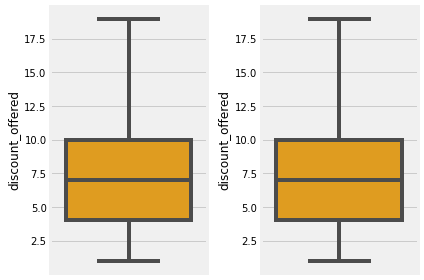

In [33]:
# Visualize after handling the outlier
for i in range(0, len(['prior_purchases', 'discount_offered'])):
               plt.subplot(1,2, i+1)
               sns.boxplot(y= df_dt[col], color = 'orange', orient = 'v');
               plt.tight_layout();

Figure above represents the data after handling the outliers.

## 2.4. Feature Transformation: Log Transformation

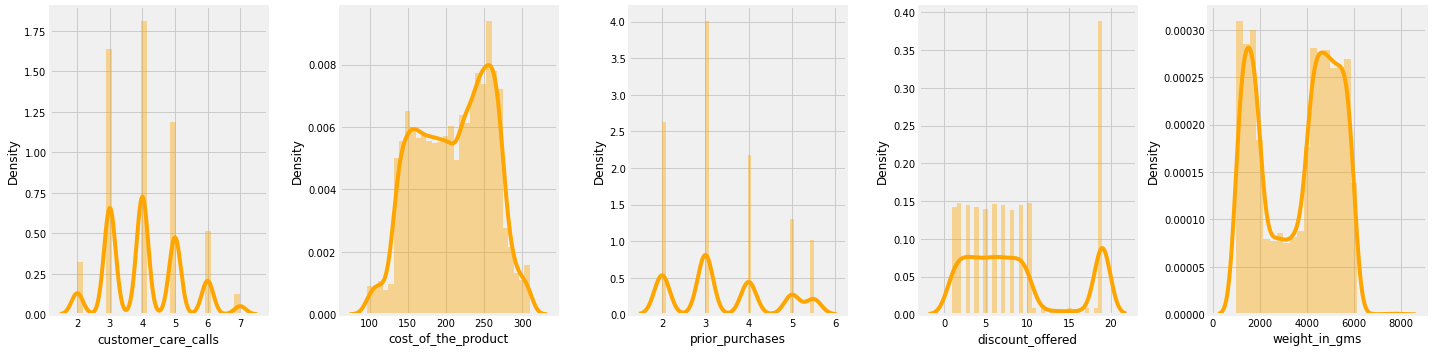

In [34]:
# Check data distribution
plt.figure(figsize=(20,5))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.distplot(df_dt[numeric[i]], color='orange')
    plt.tight_layout()

In [35]:
# Apply log transformation
for col in numeric:
    df_dt[col] = (df_dt[col]+1).apply(np.log)

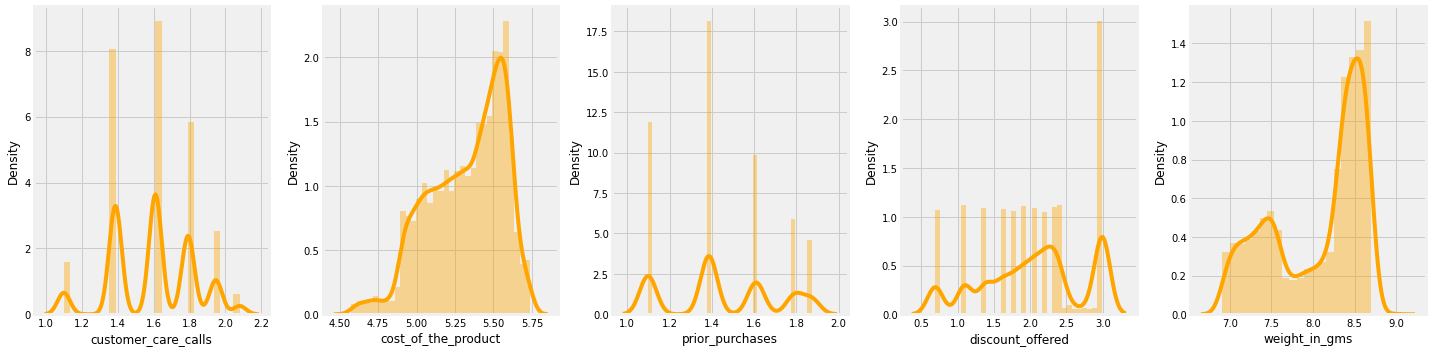

In [36]:
# Visualize after log transformation
plt.figure(figsize=(20,5))
for i in range(0,len(numeric)):
    plt.subplot(1, len(numeric), i+1)
    sns.distplot(df_dt[numeric[i]], color='orange')
    plt.tight_layout()

## 2.5. Feature Scaling: Standardization

In [37]:
# Apply standardization
for col in numeric:
    df_dt[col]= StandardScaler().fit_transform(df_dt[col].values.reshape(len(df_dt), 1))

In [38]:
# check after applying standardization
df_dt.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,is_late
count,10999.00000,1.099900e+04,10999.000000,1.099900e+04,1.099900e+04,1.099900e+04,1.099900e+04,10999.000000
mean,5500.00000,-6.375198e-15,2.990545,-6.128706e-15,-3.886356e-15,-5.672726e-15,8.291496e-16,0.596691
std,3175.28214,1.000045e+00,1.413603,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,0.490584
min,1.00000,-2.177630e+00,1.000000,-3.086779e+00,-1.387728e+00,-1.947658e+00,-2.073431e+00,0.000000
25%,2750.50000,-9.146463e-01,2.000000,-7.773403e-01,-2.636003e-01,-6.234286e-01,-9.814039e-01,0.000000
50%,5500.00000,6.500001e-02,3.000000,1.892606e-01,-2.636003e-01,5.582372e-02,4.788573e-01,1.000000
75%,8249.50000,8.654293e-01,4.000000,8.428454e-01,6.083412e-01,5.160551e-01,8.317281e-01,1.000000
max,10999.00000,2.128413e+00,5.000000,1.708704e+00,1.633539e+00,1.380053e+00,1.622939e+00,1.000000


## 2.6. Feature Selection: Chi Square Method

In [39]:
# Selection for categorial feature
# Import module
from scipy.stats import chi2_contingency

category = ['warehouse_block','mode_of_shipment','product_importance', 
            'gender','customer_rating']
chi2_check = []
# Iteration
for col in category:
    # If pvalue < 0.05 
    if chi2_contingency(pd.crosstab(df_dt['is_late'], df_dt[col]))[1] < 0.05 :
        chi2_check.append('Reject Null Hypothesis')
    # If pvalue > 0.05
    else :
        chi2_check.append('Fail to Reject Null Hypothesis')
        
# Make the result into dataframe
res = pd.DataFrame(data = [category, chi2_check]).T
# Rename columns
res.columns = ['Column', 'Hypothesis']
res

,Column,Hypothesis
0,warehouse_block,Fail to Reject Null Hypothesis
1,mode_of_shipment,Fail to Reject Null Hypothesis
2,product_importance,Reject Null Hypothesis
3,gender,Fail to Reject Null Hypothesis
4,customer_rating,Fail to Reject Null Hypothesis


From the chi square test above, only feature `product_importance` rejects the null hypothesis. It means that there is a relationship between the feature and target variable. We will try to go more detail. Which values in feature `product_importance`  do have a strong relationship with the target variable ?

In [40]:
# Adjusted P-Value use the Bonferroni-adjusted method

# Initiate empty dictionary
check = {}
# Iteration for product_importance column
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    # One hot encoding product_importance column
    dummies = pd.get_dummies(df_dt[i])
    # Initiate Bonferroni-adjusted formula
    bon_p_value = 0.05/df_dt[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(df_dt['is_late'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else :
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
# Make the result into dataframe
res_chi_ph = pd.DataFrame(data=[check.keys(), check.values()]).T
# Rename the columns
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

,Pair,Hypothesis
0,product_importance-high,Reject Null Hypothesis
1,product_importance-low,Fail to Reject Null Hypothesis
2,product_importance-medium,Fail to Reject Null Hypothesis


Feature `product_importance` with **high category** has a stronger relationship with the target variable.

## 2.7. Feature Encoding: One Hot Encoding

In [41]:
# one hot encoding feature product_importance and keep high category
onehots = pd.get_dummies(df_dt['product_importance'], prefix = 'product_importance')
df_dt = df_dt.join(onehots)
# drop all categorical columns & 'id, except product_importance_high
df_dt.drop(columns=['warehouse_block','gender','mode_of_shipment',
                   'product_importance', 'product_importance_low',
                   'product_importance_medium','id'], inplace = True)
# check dataframe after encoding
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_care_calls      10999 non-null  float64
 1   customer_rating          10999 non-null  int64  
 2   cost_of_the_product      10999 non-null  float64
 3   prior_purchases          10999 non-null  float64
 4   discount_offered         10999 non-null  float64
 5   weight_in_gms            10999 non-null  float64
 6   is_late                  10999 non-null  int64  
 7   product_importance_high  10999 non-null  uint8  
dtypes: float64(5), int64(2), uint8(1)
memory usage: 612.4 KB


The final features which will be used for modelling consist of 7 features : *customer_care_calls, customer_rating, cost_of_the_product, prior_purchases, discount_offered, weight_in_gms, and product_importance_high*.

# 3. Machine Learning Model & Evaluation

## 3.1. Separate feature & target column

In [42]:
# Inititate feature & target
X = df_dt.drop(columns = 'is_late')
y = df_dt['is_late']

## 3.2.Split train & test data

In [43]:
# Split Train & Test Data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42)

## 3.3.Fit & Evaluation Model

In [44]:
# Create function to fit model & model evaluation
def fit_evaluation(Model, Xtrain, ytrain, Xtest, ytest):
    model = Model # initiate model
    model.fit(Xtrain, ytrain) # fit the model
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain)
    train_score = model.score(Xtrain, ytrain) # Train Accuracy
    test_score = model.score(Xtest, ytest)    # Test Accuracy
    fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)
    AUC = auc(fpr, tpr) # AUC
    return round(train_score,2), round(test_score,2), round(precision_score(ytest, y_pred),2), \
           round(recall_score(ytrain, y_pred_train),2),round(recall_score(ytest, y_pred),2), \
           round(f1_score(ytest, y_pred),2), round(AUC,2)

### 3.3.1.Default Parameter

In [48]:
# Inititate algorithm
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(random_state=42)
xgb = XGBClassifier(random_state=42)

# Create function to make the result as dataframe 
def model_comparison_default(X,y):  
    
    # Logistic Regression
    lr_train_score, lr_test_score, lr_pr, lrtr_re, lrte_re, lr_f1, lr_auc = fit_evaluation(
        lr, Xtrain, ytrain, Xtest, ytest)
    # Decision Tree
    dt_train_score, dt_test_score, dt_pr, dttr_re, dtte_re, dt_f1, dt_auc = fit_evaluation(
        dt, Xtrain, ytrain, Xtest, ytest)
    # Random Forest
    rf_train_score, rf_test_score, rf_pr, rftr_re, rfte_re, rf_f1, rf_auc = fit_evaluation(
        rf, Xtrain, ytrain, Xtest, ytest)
    # KNN
    knn_train_score, knn_test_score, knn_pr, knntr_re, knnte_re, knn_f1, knn_auc = fit_evaluation(
        knn, Xtrain, ytrain, Xtest, ytest)
    # SVC
    svc_train_score, svc_test_score, svc_pr, svctr_re, svcte_re, svc_f1, svc_auc = fit_evaluation(
        svc, Xtrain, ytrain, Xtest, ytest)
    # XGBoost
    xgb_train_score, xgb_test_score, xgb_pr, xgbtr_re, xgbte_re, xgb_f1, xgb_auc = fit_evaluation(
        xgb, Xtrain, ytrain, Xtest, ytest)
    
    
    models = ['Logistic Regression','Decision Tree','Random Forest',
             'KNN','SVC','XGBoost']
    train_score = [lr_train_score, dt_train_score, rf_train_score, 
                   knn_train_score, svc_train_score, xgb_train_score]
    test_score = [lr_test_score, dt_test_score, rf_test_score,
                  knn_test_score, svc_test_score, xgb_test_score]
    precision = [lr_pr, dt_pr, rf_pr, knn_pr, svc_pr, xgb_pr]
    recall_train = [lrtr_re, dttr_re, rftr_re, knntr_re, svctr_re, xgbtr_re]
    recall_test = [lrte_re, dtte_re, rfte_re, knnte_re, svcte_re, xgbte_re]
    f1 = [lr_f1, dt_f1, rf_f1, knn_f1, svc_f1, xgb_f1]
    auc = [lr_auc, dt_auc, rf_auc, knn_auc, svc_auc, xgb_auc]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, 
                                          precision, recall_train, recall_test,
                                          f1,auc]).T.rename({0: 'Model',
                                                             1: 'Accuracy_Train',
                                                             2: 'Accuracy_Test',
                                                             3: 'Precision',
                                                             4: 'Recall_Train',
                                                             5: 'Recall_Test',
                                                             6: 'F1 Score',
                                                             7: 'AUC'
                                                                                  }, axis=1)
    return model_comparison
    


In [49]:
'''
The evaluation metric scores will be shown using table, so that easy to compare the performance of model.
'''
# Performance of models with default parameter
model_comparison_default(X,y)

,Model,Accuracy_Train,Accuracy_Test,Precision,Recall_Train,Recall_Test,F1 Score,AUC
0,Logistic Regression,0.63,0.63,0.67,0.75,0.75,0.71,0.6
1,Decision Tree,1.0,0.66,0.72,1.0,0.71,0.71,0.64
2,Random Forest,1.0,0.67,0.76,1.0,0.66,0.71,0.67
3,KNN,0.76,0.64,0.72,0.77,0.67,0.69,0.64
4,SVC,0.68,0.66,0.88,0.52,0.51,0.65,0.7
5,XGBoost,0.71,0.69,0.9,0.55,0.54,0.68,0.73


Based on the result above, Decision tree, Random Forest, & KNN tend to be overfitting. We can see the accracy decreases from train to test. Besides that Logistic regression, SVC, and XGBoost can generalize well enough. In this project, we concern to minimize false negative, so that the model can avoid prediction errors of parcels that should be late and the company can handle the problem earlier. Logistic regression looks more balance between precision and recall. It can be selected as a candidate of the model. While SVC and XGBoost have the big margin between recall and precision. We will do hyperparamter tuning to do model optimization and to see whether it will improve the performance of the models or not.

### 3.3.2. Hyperparameter

#### Logistic Regression

In [50]:
# Parameters to be tuned
penalty = ['l2','l1','elasticnet'] # type of regularization
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Initiate the model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42,  scoring='recall')

# Fitting Model & Evaluation
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
model.best_estimator_

LogisticRegression(C=0.0001, random_state=42)

#### Decision Tree

In [51]:
# Let's do hyperparameter tuning using RandomizesearchCV

# Parameters to be tuned
max_depth = list(range(1,10)) #Number of features to consider at every split
min_samples_split = list(range(5,10)) # Minimum number of samples required to split a node
min_samples_leaf = list(range(5,15)) # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt', 'log2'] #Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

# Initiate hyperparameters
hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion = criterion,
                       splitter = splitter)

# Initiate model
dt_tun = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt_tun, hyperparameters, cv=10, scoring='recall',random_state=42) 
model.fit(Xtrain, ytrain)
y_pred_tun = model.predict(Xtest)
model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=12, min_samples_split=6,
                       random_state=42)

#### Random Forest

In [52]:
# Parameters to be tuned
params = {'max_depth':[50],'n_estimators':[100,150], 
          'criterion':['gini', 'entropy']}
# Initiate model
model = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                     param_grid=params,scoring='recall', cv=5)
# Fit model
model.fit(Xtrain,ytrain)
y_pred = model.predict(Xtest)
# Get best estimator
model.best_estimator_

RandomForestClassifier(max_depth=50, random_state=42)

#### KNN

In [53]:
# Parameters to be tuned
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
KNN_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(KNN_2, hyperparameters, cv=10, scoring = 'recall')

#Fit the model
best_model = clf.fit(X,y)
# Get best estimator
clf.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=1)

#### SVC

In [54]:
# Parameters to be tuned
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.0001, 0.001, 0.002] 
gamma = ['scale', 'auto']

#Convert to dictionary
hyperparameters = dict(kernel=kernel, C=C, gamma=gamma)

# Initiate model
svc = SVC(random_state=42) 
model = RandomizedSearchCV(svc, hyperparameters, cv=5, random_state=42, 
                           scoring='recall')

# Fitting Model & Evaluation
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
model.best_estimator_

SVC(C=0.0001, kernel='linear', random_state=42)

#### XG Boost

In [55]:
# Parameters to be tuned

hyperparameters={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]    
}
# Initiate model
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation
y_pred = xg_tuned.predict(Xtest)#Check performa dari model
xg_tuned.best_estimator_

XGBClassifier(colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=15,
              random_state=42)

#### Tuned Parameter

In [58]:
# Inititate best estimator
lr_tune = LogisticRegression(C=0.0001, random_state=42)
dt_tune = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_leaf=12, min_samples_split=6,
                       random_state=42)
rf_tune = RandomForestClassifier(max_depth=50, random_state=42)
knn_tune = KNeighborsClassifier(leaf_size=1, n_neighbors=1)
svc_tune = SVC(C=0.0001, kernel='linear', random_state=42)
xgb_tune = XGBClassifier(colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=15,
              random_state=42)

# Create function to make the result as dataframe 
def model_comparison_tuned(X,y):  
    
    # Logistic Regression
    lr_train_score, lr_test_score, lr_pr, lrtr_re, lrte_re, lr_f1, lr_auc = fit_evaluation(
        lr_tune, Xtrain, ytrain, Xtest, ytest)
    # Decision Tree
    dt_train_score, dt_test_score, dt_pr, dttr_re, dtte_re, dt_f1, dt_auc = fit_evaluation(
        dt_tune, Xtrain, ytrain, Xtest, ytest)
    # Random Forest
    rf_train_score, rf_test_score, rf_pr, rftr_re, rfte_re, rf_f1, rf_auc = fit_evaluation(
        rf_tune, Xtrain, ytrain, Xtest, ytest)
    # KNN
    knn_train_score, knn_test_score, knn_pr, knntr_re, knnte_re, knn_f1, knn_auc = fit_evaluation(
        knn_tune, Xtrain, ytrain, Xtest, ytest)
    # SVC
    svc_train_score, svc_test_score, svc_pr, svctr_re, svcte_re, svc_f1, svc_auc = fit_evaluation(
        svc_tune, Xtrain, ytrain, Xtest, ytest)
    # XGBoost
    xgb_train_score, xgb_test_score, xgb_pr, xgbtr_re, xgbte_re, xgb_f1, xgb_auc = fit_evaluation(
        xgb_tune, Xtrain, ytrain, Xtest, ytest)
    
    
    models = ['Logistic Regression','Decision Tree','Random Forest',
             'KNN','SVC','XGBoost']
    train_score = [lr_train_score, dt_train_score, rf_train_score, 
                   knn_train_score, svc_train_score, xgb_train_score]
    test_score = [lr_test_score, dt_test_score, rf_test_score,
                  knn_test_score, svc_test_score, xgb_test_score]
    precision = [lr_pr, dt_pr, rf_pr, knn_pr, svc_pr, xgb_pr]
    recall_train = [lrtr_re, dttr_re, rftr_re, knntr_re, svctr_re, xgbtr_re]
    recall_test = [lrte_re, dtte_re, rfte_re, knnte_re, svcte_re, xgbte_re]
    f1 = [lr_f1, dt_f1, rf_f1, knn_f1, svc_f1, xgb_f1]
    auc = [lr_auc, dt_auc, rf_auc, knn_auc, svc_auc, xgb_auc]
    
    model_comparison = pd.DataFrame(data=[models, train_score, test_score, 
                                          precision, recall_train, recall_test,
                                          f1,auc]).T.rename({0: 'Model',
                                                             1: 'Accuracy_Train',
                                                             2: 'Accuracy_Test',
                                                             3: 'Precision',
                                                             4: 'Recall_Train',
                                                             5: 'Recall_Test',
                                                             6: 'F1 Score',
                                                             7: 'AUC'
                                                                                  }, axis=1)
    
    return model_comparison

In [59]:
# tuned model
model_comparison_tuned(X,y)

,Model,Accuracy_Train,Accuracy_Test,Precision,Recall_Train,Recall_Test,F1 Score,AUC
0,Logistic Regression,0.59,0.6,0.6,1.0,1.0,0.75,0.5
1,Decision Tree,0.67,0.68,0.8,0.62,0.62,0.7,0.69
2,Random Forest,1.0,0.67,0.76,1.0,0.66,0.71,0.67
3,KNN,1.0,0.67,0.73,1.0,0.71,0.72,0.65
4,SVC,0.59,0.6,0.6,1.0,1.0,0.75,0.5
5,XGBoost,0.94,0.66,0.74,0.92,0.67,0.7,0.65


After hyperparameter tuning, Random Forest and KNN are still overfitting. And also XGBoost turns to be overfitting. Eventhough logistic regression and SVC are not overfitting and have the highest recall, but the scores are not balance with the precision. Finally among all models with default and tuned parameter,Decision tree with hyperparametertuning has a good balance between its scores and it has the highest AUC score. Moreover the model is neither underfitting nor overfitting. 

### 3.3.3.Confusion matrix

In [60]:
from sklearn.metrics import plot_confusion_matrix

def confusion_matrix(Model, Xtrain, ytrain, Xtest, ytest):
    model = Model
    plot_confusion_matrix(model.fit(Xtrain, ytrain), Xtest, ytest,
                     display_labels=['on_time','late'], cmap = 'Oranges', 
                     values_format='.0f')  
    plt.grid(False)
    plt.show()  

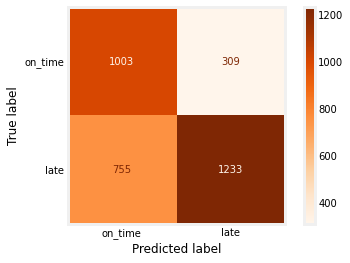

In [61]:
# After hyperparameter tuning
confusion_matrix(dt_tune, Xtrain, ytrain, Xtest, ytest)

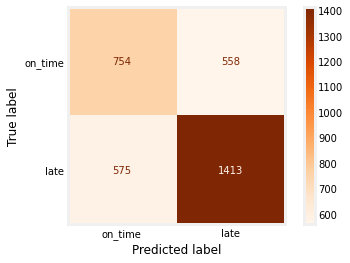

In [62]:
# Before hyperparameter tuning
confusion_matrix(dt, Xtrain, ytrain, Xtest, ytest)

### 3.3.4.Feature Importance

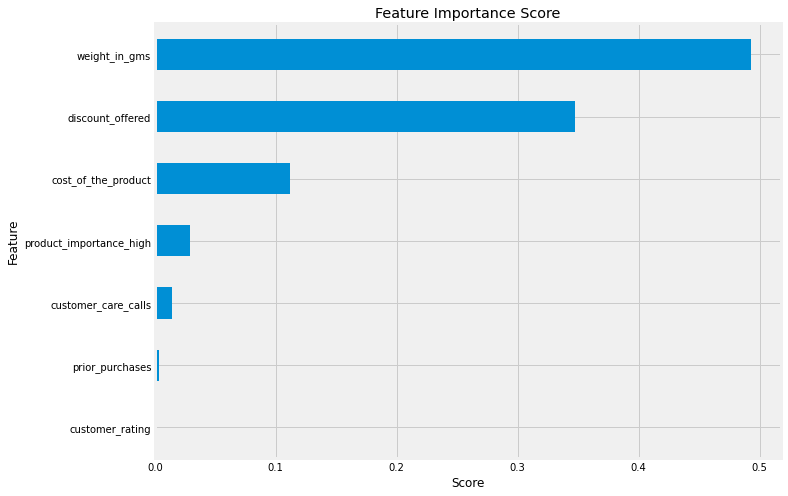

In [63]:
feat_importances = pd.Series(dt_tune.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('Score');
plt.ylabel('Feature');
plt.title('Feature Importance Score');

Feature `weight_in_gms` & `discount_offered` are the top two features that used by Decision tree algorithm to do a prediction.